In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def spike(t,t0):
    return 1/((t-t0)**2+1)**2000
    
def fun(t):
    return spike(t,0.5) + spike(t,0.2) + spike(t,0.3)

n = 1000
t = np.linspace(0,1,n)
y = np.array(list(map(lambda i: fun(t[i]), range(n))))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


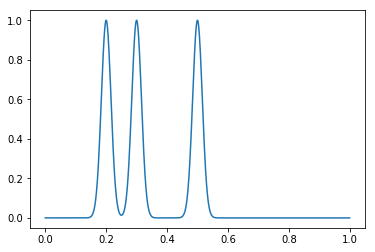

In [28]:
plt.plot(t,y)

In [52]:

def spike(t,a,expo,tcrit):
    return a*1.0/((t-tcrit)**2+1)**(expo*100)

def anomaly(t,a,tcrit):
    return a*1.0/((t-tcrit)**2+1)**(2.5*100.0)

def spike_to_anomaly(a,expo,t0):
    if expo > 3.0 and a > 0.9:
        return (1.0,t0)
    else:
        return (0.0,t0)


In [59]:

SPIKES = [
    (0.5,4.0,2),
    (1.0,4.0,4),
    (1.0,0.1,6),
    (0.5,0.02,10),
    (1.0,6.0,14),
    (0.95,3.5,16)
]


ANOMALIES = list(map(lambda s: spike_to_anomaly(*s), SPIKES))

def spike_fun(t):
    res = 0.0
    for a,expo,tcrit in SPIKES:
        res += spike(t,a,expo,tcrit)
    return res

def anomaly_fun(t):
    res = 0.0
    for a,tcrit in ANOMALIES:
        res += anomaly(t,a,tcrit)

    return res

def spikes(ts):
    return np.array(list(map(lambda i: spike_fun(t[i]), range(len(ts)))))

def anomalies(ts):
    return np.array(list(map(lambda i: anomaly_fun(t[i]), range(len(ts)))))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


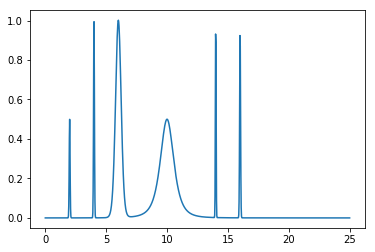

In [60]:

t = np.linspace(0., 25., 1000)
s = spikes(t)
a = anomalies(t)

plt.plot(t,s)

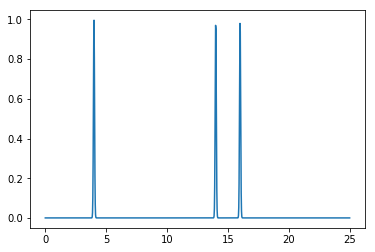

In [61]:
plt.plot(t,a)